# Income and Wealth's Impact on Communicable Diseases📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

Looking at the spread of diseases is crucial to helping improve human health and well beings. Breaking down the Income and Disease numbers could help to provide some insight into how they correlate with one another. Diseases can become a very big problem very quickly. We got to see this play out during the chaos when Covid-19 was spreading around. Analyzing the impact between income and infections could hopefully draw more attention to situations like what happened with Covid-19. Addressing the spread of diseases is critical to saving lives across the globe and this problem will only continue to grow as diseases adapt and evolve overtime.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->


I want to specifically focus on how significant diseases impact human health in different areas of income / around the globe. Being able to break down significant diseases and income datasets could allow for different correlations or patterns to be seen between the impact of these diseases and the income area they are associated in. Would we be able to draw potential conclusions from this data to help save lives or better address these diseases in different income areas? Focusig the data around locational data will provide me with some targeted data that I can break down to better answer the main question. 


## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->



Income does have a significant and noticeble effect on how impactful diseases are to human health. Analyzing the disease datasets as well as the income data sets allows us to see the bigger picture as we able able to correlated different different income with different disease risks. Utilizing the data vizualizations with demonstrate the correlations between income and disease impact. In order to help limit the focus, I will be prioritizing the most significant and impactful diseases.


***
I hope to be more particular and provide clearer correlations after breaking down the data. For example, an answer could look like: 

Cholera has a significant impact on lower income communities. Noticeble trends between lower income areas and higher infections / deaths from cholera is noted.

Higher income areas report higher level of vaccinations which decrease disease impact on higher income locations. The reverse is also seen with lower income areas reporting lower level of vaccinations and higher levels of infections and deaths. 


## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

There are several different data sources I will be pulling from for this project.


Data Source 1: WHO Data (Wide Range of Communicable Diseases Datasets - temporary)

    https://apps.who.int/gho/data/node.main
    
    The CSV's for WHO disease data are located in the OtherDisease folder in the Data folder. The primary focus will be cholera with some analytics towards other Diseases as well. 

Data Source 2: Global Income Data

    https://datacatalog.worldbank.org/

    income_category.csv is a file that notes categorical income levels based off country

Data Source 3: IHME Global Burden of Disease (2019) Study

    https://www.healthdata.org/

    gbd_countries.csv is a dataset that includes country, year, type of disease, and number of deaths / DALYs

Data Source 4: Our World In Data

    https://ourworldindata.org/burden-of-disease

    gbd_communicable_diseases.csv is a refined dataset that includes the country, country code, year, and DALYs values



## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->


This project is quite complex. I want to break down different communicable diseases and their impact on lower income countries. There are a lot of different ways to break this down so I wanted to focus on looking at the overall income of different countries and then comparing that to different disease cases, total deaths, and DALYs values to see how they impact different income communities. 

I wanted to focus on a few diseases such as cholera and measles from the WHO datasets first to see if I can establish a patter before working with the bigger sets of data. I then want to move on to the GBD data to get a better picture of the overall data and its impact. I want to analyze how the different statistics differ based on location and income to help correlate the data. 

I plan on doing this by almost breaking down the analysis and visualizations into different sections to help draw conclusions. I want to draw meaningful conclusions so I will do my best to provide accurate and meaningful visualizations. 

### Checkpoint 1 Overview

- I was able to import the different datasets that I wanted to work with and was able to give a summary of my plans for the next step. 

## Exploratory Data Analysis and Visualization

In [813]:

import sys
assert sys.version_info >= (3, 10)

import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
from scipy.stats import trim_mean
import os


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (
  OneHotEncoder,
  OrdinalEncoder,
  StandardScaler
)
from sklearn.impute import (
  SimpleImputer
)

from sklearn.model_selection import (
  StratifiedShuffleSplit,
  train_test_split,
  cross_val_score,
  KFold,
  GridSearchCV
)

from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
  RandomForestClassifier, 
  GradientBoostingClassifier,
  BaggingClassifier
)

import pickle

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

In [814]:
income_cat = pd.read_csv('Data/Income/income_category.csv')

In [815]:
cholera_cases = pd.read_csv('Data/Cholera/cholera1_data.csv')
cholera_deaths = pd.read_csv('Data/Cholera/cholera2_data.csv')

In [816]:
measles_data = pd.read_csv('Data/OtherDiseases/measles_data.csv')

In [817]:
gbd_data_countries = pd.read_csv('Data/GBD/gbd_countries.csv')
income_grouping_data = pd.read_csv('Data/GBD/revised_world_bank_data.csv')
gbd_cd_data = pd.read_csv('Data/GBD/gbd_communicable_diseases.csv')

## Exploratory Data Analysis (EDA)

My goal is to breakdown how income correlates with communicable disease's impact one different countries. I first want to take a look at the income datasets to set a base to go off of.

### Income Information

In [819]:
display(income_cat.head(5))

,Economy,Code,Region,IncomeGroup
0,Aruba,ABW,Latin America & Caribbean,High income
1,Afghanistan,AFG,South Asia,Low income
2,Angola,AGO,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,Europe & Central Asia,Upper middle income
4,Andorra,AND,Europe & Central Asia,High income


In [820]:
display(income_cat.shape)

(218, 4)

In [821]:
display(income_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Economy      218 non-null    object
 1   Code         218 non-null    object
 2   Region       218 non-null    object
 3   IncomeGroup  217 non-null    object
dtypes: object(4)
memory usage: 6.9+ KB


None

In [822]:
display(income_cat.isnull().sum())

Economy        0
Code           0
Region         0
IncomeGroup    1
dtype: int64

In [823]:
display(income_cat.describe())

,Economy,Code,Region,IncomeGroup
count,218,218,218,217
unique,218,218,7,4
top,Aruba,ABW,Europe & Central Asia,High income
freq,1,1,58,83


Since there are no huge outliers, duplicate values, or anomalies in the data we don't have to focus too much on cleaning the data. However, there is one missing value for the income group for income_category.csv. So I will focus on cleaning up that value.

In [824]:
income_cat_missing = income_cat[income_cat.isnull().any(axis=1)]
print(income_cat_missing)

           Economy Code                     Region IncomeGroup
207  Venezuela, RB  VEN  Latin America & Caribbean         NaN


The data comes with a note that lists the breakdown: 

This table classifies all World Bank member countries (189), and all other economies with populations of more than 30,000. For operational and analytical purposes, economies are divided among income groups according to 2022 gross national income (GNI) per capita, calculated using the World Bank Atlas method. The groups are: low income, $1,135 or less; lower middle income, $1,136  to $4,465; upper middle income, $4,466 to $13,845; and high income, $13,846 or more. The effective operational cutoff for IDA eligibility is $1,315 or less.

https://data.worldbank.org/indicator/NY.GNP.PCAP.CD?locations=VE

Venezuela's most recent value is listed at 13,010 putting in the upper middle income. 

In [825]:
missing_value = income_cat_missing.index[0]

income_cat.loc[missing_value, 'IncomeGroup'] = 'Upper middle income'

In [826]:
income_cat.isnull().sum()

Economy        0
Code           0
Region         0
IncomeGroup    0
dtype: int64

In [827]:
display(income_cat.value_counts('IncomeGroup'))

IncomeGroup
High income            83
Upper middle income    55
Lower middle income    54
Low income             26
Name: count, dtype: int64

<Axes: xlabel='IncomeGroup', ylabel='Count'>

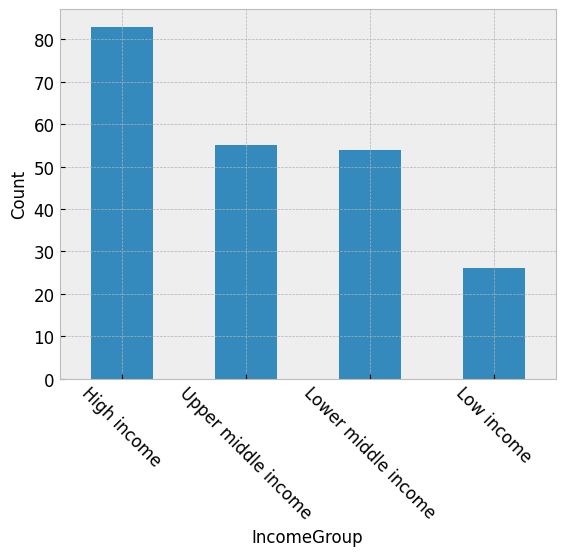

In [828]:
display(income_cat['IncomeGroup'].value_counts().plot(kind='bar', xlabel='IncomeGroup', ylabel='Count', rot=-45))

This graph includes general information of how many of each different income group there are

C:\Users\Kyle\AppData\Local\Temp\ipykernel_3060\2718635910.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



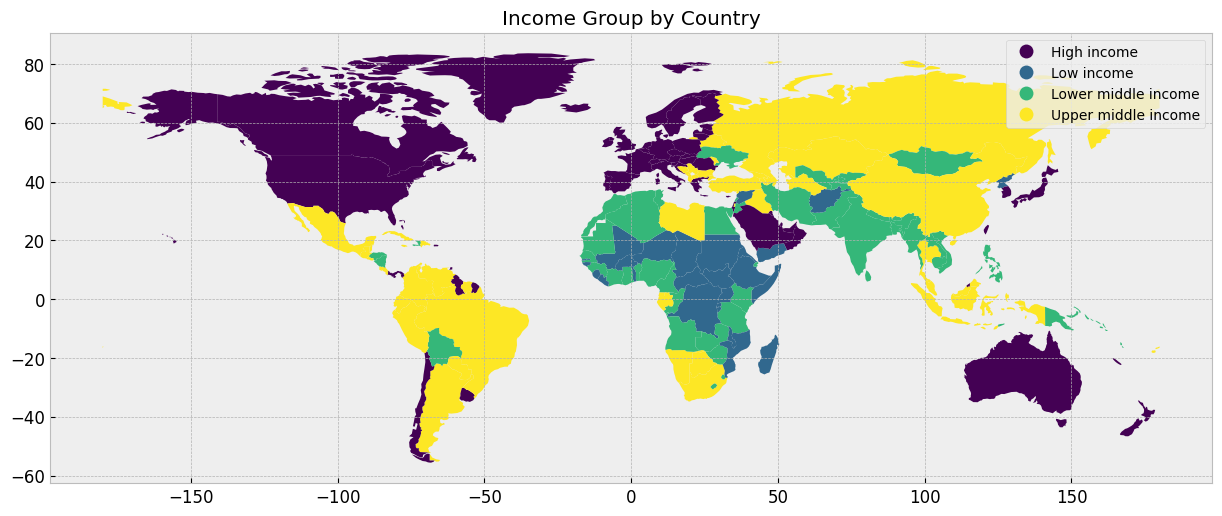

In [829]:
# Loaded country boundaries - (GeoJSON file)
country_boundries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_income_cat = country_boundries.merge(income_cat, how='left', left_on='iso_a3', right_on='Code')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_income_cat.plot(column='IncomeGroup', cmap='viridis', ax=ax, legend=True)
plt.title('Income Group by Country')
plt.show()


This is a geomap of the income grouping of each country. This project will explore how income impacts human life. Hopefully we will begin to see patterns emerge. Maybe countries indicated as low or lower middle income having a correlation with greater negative impact to human life. As we explore the diseases by country, we will be able to relate back to the income information throughout the project.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

- https://apps.who.int/gho/data/node.main
- https://datacatalog.worldbank.org/
- https://www.healthdata.org/
- https://ourworldindata.org/burden-of-disease

In [830]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 10596 bytes to source.py
